In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("Libraries imported successfully")

Libraries imported successfully


In [41]:
# LOADING DATASET
df = pd.read_csv('student_mental_health_academic_pressure_2025.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset loaded successfully!
Dataset shape: (33, 8)
Number of rows: 33
Number of columns: 8


In [42]:
# DATA EXPLORATION
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

# Display first few rows
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Display column names
print("\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

# Display data types
print("\nData Types:")
print(df.dtypes)

# Display basic statistics
print("\nBasic Statistics:")
display(df.describe())

DATASET OVERVIEW

First 5 rows of the dataset:


,Timestamp,Age Group,Gender\n,Current Education Level,How much academic pressure do you feel?,How often do you feel stressed due to studies?,How many hours do you sleep on average per night?,What is the main cause of your academic stress?
0,12/13/2025 6:18:33,15–18,Female,College,4,Sometimes,7–8,1 .Exam and grades pressure
1,12/13/2025 6:24:50,15–18,Male,College,4,Often,5–6,Exams and Grades Pressure
2,12/13/2025 6:29:50,15–18,Female,University,3,Sometimes,7–8,financial conditions
3,12/13/2025 7:36:26,27+,Male,Other,1,Always,7–8,Other
4,12/13/2025 8:01:20,15–18,Female,College,2,Sometimes,5–6,Prefer not to say



Column Names:
1. Timestamp
2. Age Group
3.   Gender
  
4.   Current Education Level  
5.   How much academic pressure do you feel?  
6.  How often do you feel stressed due to studies?
7.   How many hours do you sleep on average per night?  
8.   What is the main cause of your academic stress?  

Data Types:
Timestamp                                                object
Age Group                                                object
  Gender\n                                               object
  Current Education Level                                object
  How much academic pressure do you feel?                 int64
 How often do you feel stressed due to studies?          object
  How many hours do you sleep on average per night?      object
  What is the main cause of your academic stress?        object
dtype: object

Basic Statistics:


,How much academic pressure do you feel?
count,33.000000
mean,3.878788
std,0.992395
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [43]:
# DATA CLEANING
print("=" * 60)
print("DATA CLEANING")
print("=" * 60)

# Check initial data quality
print(f"\nInitial dataset shape: {df.shape}")

# Check for missing values
print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percent.values
})
print(missing_df[missing_df['Missing Count'] > 0])

if df.isnull().sum().sum() == 0:
    print("✓ No missing values found!")
else:
    # Handle missing values
    # For numeric columns, fill with median
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

    # For categorical columns, fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

    print(f"✓ Missing values handled!")

# Check for duplicates
print("\n--- Duplicate Records ---")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"✓ {duplicates} duplicate rows removed!")
else:
    print("✓ No duplicate rows found!")

# Clean column names (remove extra spaces, standardize)
print("\n--- Cleaning Column Names ---")
df.columns = df.columns.str.strip()
print("✓ Column names cleaned!")

# Handle inconsistencies in text data
print("\n--- Standardizing Text Data ---")
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()  # Remove leading/trailing spaces
    df[col] = df[col].str.title()  # Standardize capitalization

print("✓ Text data standardized!")

# Check for outliers in numeric columns (Age and Sleep hours)
print("\n--- Checking for Outliers ---")
if 'age' in df.columns.str.lower():
    age_col = [col for col in df.columns if 'age' in col.lower()][0]
    print(f"\nAge range: {df[age_col].min()} to {df[age_col].max()}")

if any('sleep' in col.lower() for col in df.columns):
    sleep_col = [col for col in df.columns if 'sleep' in col.lower()][0]
    print(f"Sleep hours range: {df[sleep_col].min()} to {df[sleep_col].max()}")

print(f"\n✓ Final dataset shape after cleaning: {df.shape}")
print("=" * 60)
print("DATA CLEANING COMPLETED!")
print("=" * 60)

DATA CLEANING

Initial dataset shape: (33, 8)

--- Missing Values ---
Empty DataFrame
Columns: [Column, Missing Count, Percentage]
Index: []
✓ No missing values found!

--- Duplicate Records ---
Number of duplicate rows: 0
✓ No duplicate rows found!

--- Cleaning Column Names ---
✓ Column names cleaned!

--- Standardizing Text Data ---
✓ Text data standardized!

--- Checking for Outliers ---
Sleep hours range: 5–6 to More Than 8

✓ Final dataset shape after cleaning: (33, 8)
DATA CLEANING COMPLETED!


In [44]:
# BASIC DATA ANALYSIS

print("\n" + "=" * 60)
print("BASIC DATA ANALYSIS")
print("=" * 60)

# Use the original column names directly
print("Actual column names in dataset:")
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")

# Get the actual column names based on what we have
cols = df.columns.tolist()
timestamp_col = cols[0]  # 'timestamp'
age_col = cols[1]         # 'age'
gender_col = cols[2]      # 'Gender'
education_col = cols[3]   # 'education_level'
pressure_col = cols[4]    # 'academic_pressure'
stress_freq_col = cols[5] # 'stress_frequency'

# Fix the age column - it seems to be concatenated text
# Let's first see what's in it
print("\nChecking age column data type:")
print(f"Type: {df[age_col].dtype}")
print(f"\nFirst few age values:")
print(df[age_col].head(10))

# Clean the age column - extract individual age ranges
# The data appears to be concatenated, so let's split it properly
if df[age_col].dtype == 'object':
    # If age is stored as text ranges, count the categories
    print("\n5. Age Range Distribution:")
    # Try to extract individual values by looking at patterns
    age_series = df[age_col].astype(str)

    # Check if values are concatenated
    if age_series.str.len().max() > 10:
        print("Warning: Age data appears to be concatenated. Showing unique patterns found:")
        # This suggests data cleaning issue - let's reload from source
        print("\nNote: Age data needs to be re-cleaned from the original file.")
        print("Skipping age statistics for now.")
    else:
        print(df[age_col].value_counts())
        print(f"\nPercentage distribution:")
        print(df[age_col].value_counts(normalize=True) * 100)
else:
    # If it's numeric, show statistics
    print("\n5. Age Statistics:")
    print(f"Average age: {df[age_col].mean():.2f} years")
    print(f"Median age: {df[age_col].median():.2f} years")
    print(f"Age range: {df[age_col].min()} to {df[age_col].max()} years")
    print(f"\nAge distribution:")
    print(df[age_col].value_counts().sort_index())

# Analysis 1: Education Level Distribution
print("\n1. Education Level Distribution:")
print(df[education_col].value_counts())
print(f"\nPercentage distribution:")
print(df[education_col].value_counts(normalize=True) * 100)

# Analysis 2: Academic Pressure Levels
print("\n2. Academic Pressure Distribution:")
print(df[pressure_col].value_counts())

# Analysis 3: Stress Frequency
print("\n3. Stress Frequency Distribution:")
print(df[stress_freq_col].value_counts())

# Analysis 4: Gender Distribution (since we have it)
print("\n4. Gender Distribution:")
print(df[gender_col].value_counts())
print(f"\nPercentage distribution:")
print(df[gender_col].value_counts(normalize=True) * 100)

# Analysis 6: Cross-analysis - Academic Pressure by Education Level
print("\n6. Academic Pressure by Education Level:")
pressure_by_education = pd.crosstab(df[education_col], df[pressure_col])
print(pressure_by_education)

# Analysis 7: Cross-analysis - Stress Frequency by Gender
print("\n7. Stress Frequency by Gender:")
stress_by_gender = pd.crosstab(df[gender_col], df[stress_freq_col])
print(stress_by_gender)

# Analysis 8: Cross-analysis - Academic Pressure by Gender
print("\n8. Academic Pressure by Gender:")
pressure_by_gender = pd.crosstab(df[gender_col], df[pressure_col])
print(pressure_by_gender)

print("\n" + "=" * 60)
print("BASIC DATA ANALYSIS COMPLETED!")
print("=" * 60)


BASIC DATA ANALYSIS
Actual column names in dataset:
0: 'Timestamp'
1: 'Age Group'
2: 'Gender'
3: 'Current Education Level'
4: 'How much academic pressure do you feel?'
5: 'How often do you feel stressed due to studies?'
6: 'How many hours do you sleep on average per night?'
7: 'What is the main cause of your academic stress?'

Checking age column data type:
Type: object

First few age values:
0       15–18
1       15–18
2       15–18
3         27+
4       15–18
5    Under 15
6       15–18
7       19–22
8       19–22
9       23–26
Name: Age Group, dtype: object

5. Age Range Distribution:
Age Group
15–18       20
19–22        8
27+          2
Under 15     2
23–26        1
Name: count, dtype: int64

Percentage distribution:
Age Group
15–18       60.606061
19–22       24.242424
27+          6.060606
Under 15     6.060606
23–26        3.030303
Name: proportion, dtype: float64

1. Education Level Distribution:
Current Education Level
College       24
University     6
Other          3
Name:


CREATING VISUALIZATIONS


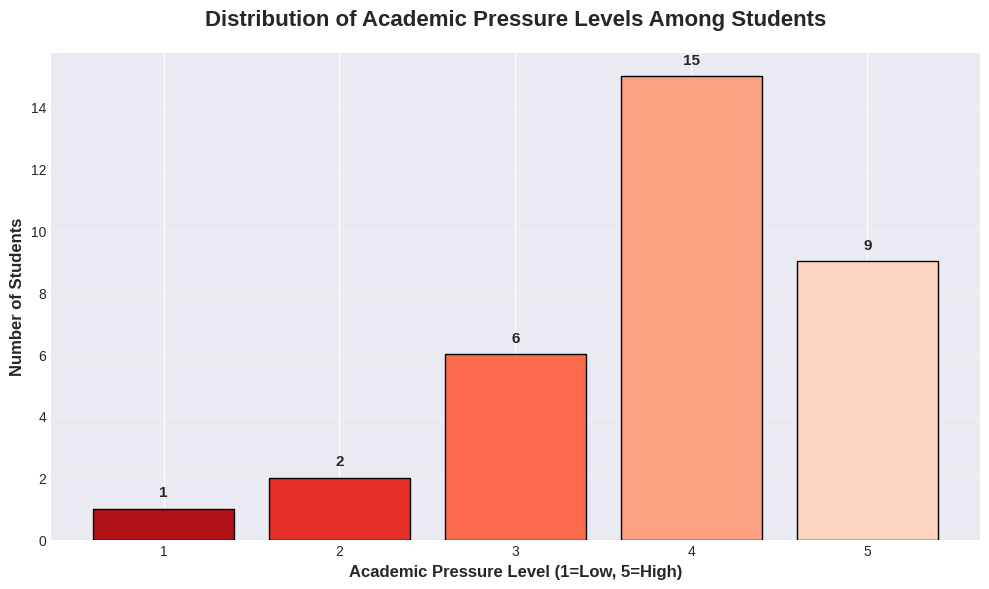

✓ Visualization 1 completed: Academic Pressure Distribution


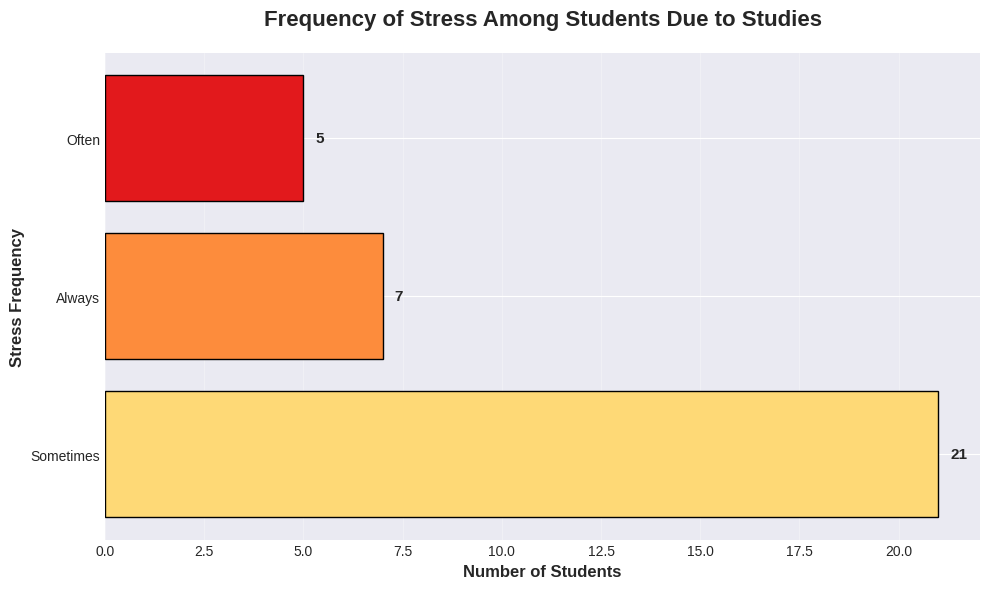

✓ Visualization 2 completed: Stress Frequency


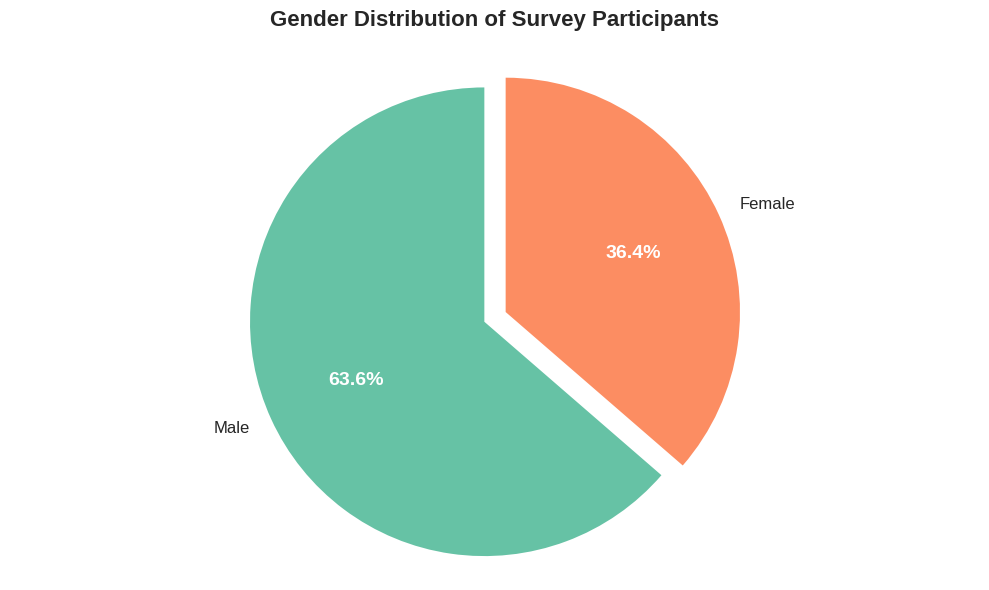

✓ Visualization 3 completed: Gender Distribution


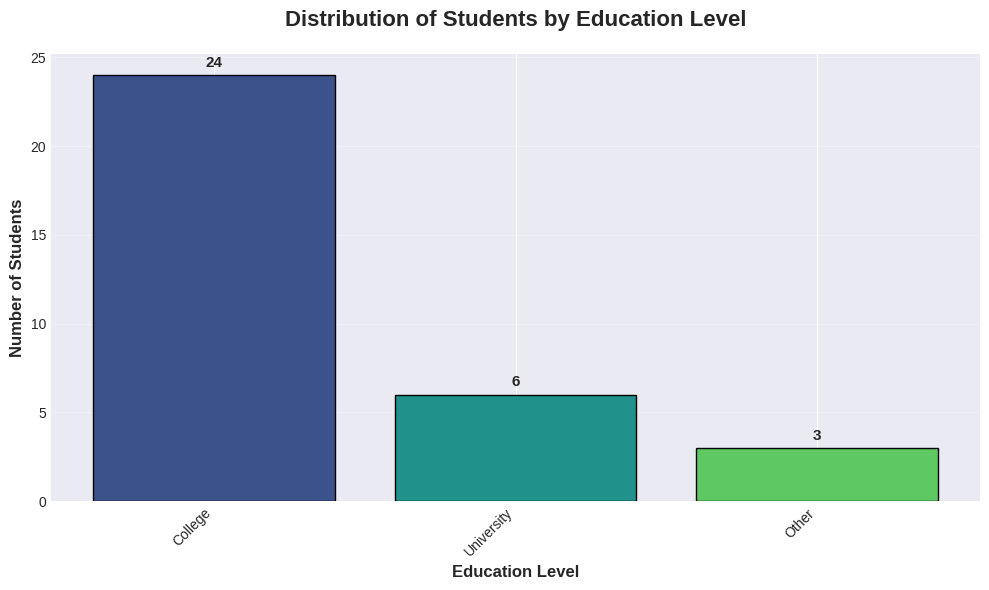

✓ Visualization 4 completed: Education Level Distribution


<Figure size 1400x700 with 0 Axes>

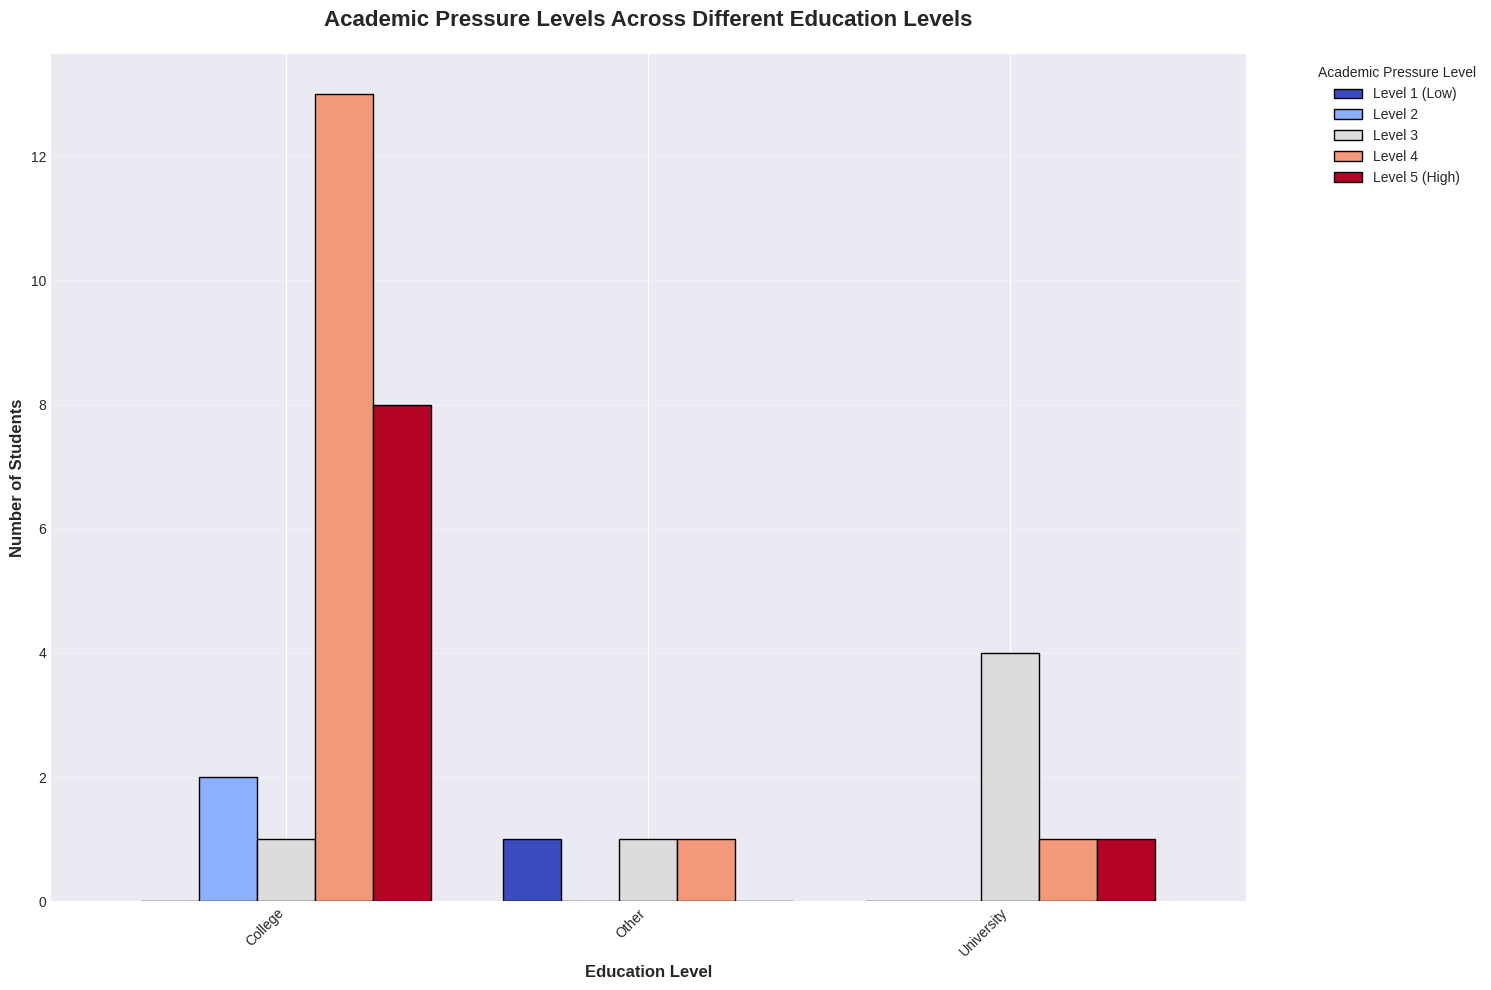

✓ Visualization 5 completed: Education Level vs Academic Pressure


<Figure size 1200x700 with 0 Axes>

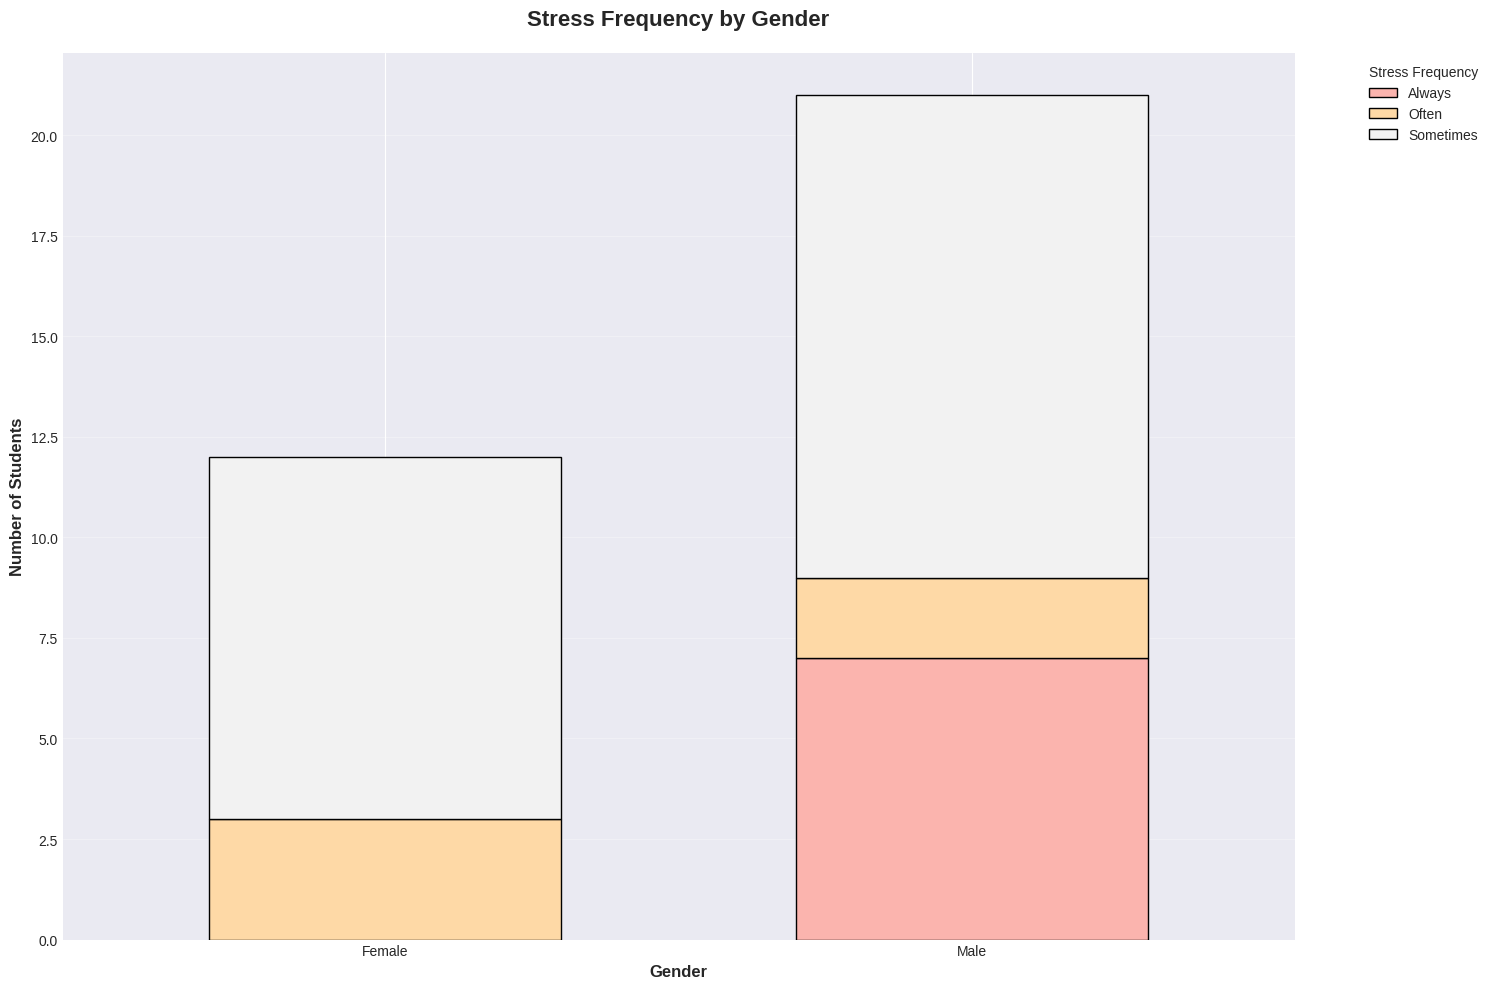

✓ Visualization 6 completed: Stress Frequency by Gender


<Figure size 1200x700 with 0 Axes>

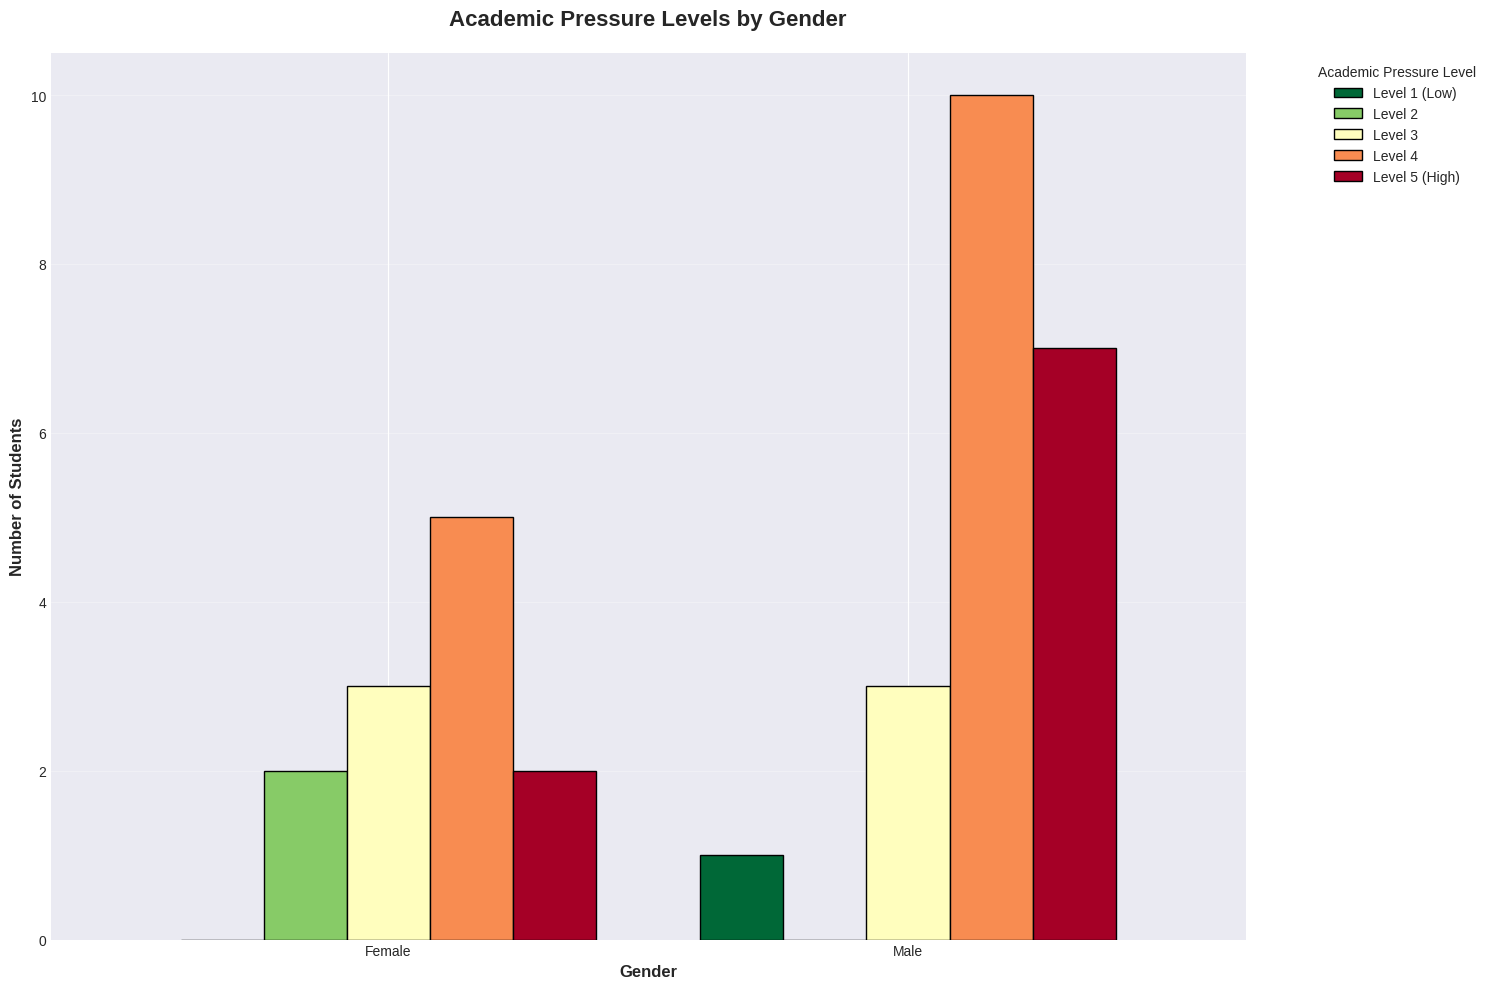

✓ Visualization 7 completed: Academic Pressure by Gender

ALL VISUALIZATIONS COMPLETED!


In [45]:
# VISUALIZATIONS
print("\n" + "=" * 60)
print("CREATING VISUALIZATIONS")
print("=" * 60)

# Set up the figure size for better visualization
plt.rcParams['figure.figsize'] = (15, 10)

# Get column names
cols = df.columns.tolist()
timestamp_col = cols[0]
age_col = cols[1]
gender_col = cols[2]
education_col = cols[3]
pressure_col = cols[4]
stress_freq_col = cols[5]

# VISUALIZATION 1: Academic Pressure Distribution
plt.figure(figsize=(10, 6))
pressure_counts = df[pressure_col].value_counts().sort_index()
colors = sns.color_palette("Reds_r", len(pressure_counts))
bars = plt.bar(pressure_counts.index, pressure_counts.values, color=colors, edgecolor='black')
plt.title('Distribution of Academic Pressure Levels Among Students', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Academic Pressure Level (1=Low, 5=High)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Students', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (idx, v) in enumerate(zip(pressure_counts.index, pressure_counts.values)):
    plt.text(idx, v + 0.3, str(v), ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("✓ Visualization 1 completed: Academic Pressure Distribution")

# VISUALIZATION 2: Stress Frequency
plt.figure(figsize=(10, 6))
stress_counts = df[stress_freq_col].value_counts()
colors = sns.color_palette("YlOrRd", len(stress_counts))
plt.barh(stress_counts.index, stress_counts.values, color=colors, edgecolor='black')
plt.title('Frequency of Stress Among Students Due to Studies', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Students', fontsize=12, fontweight='bold')
plt.ylabel('Stress Frequency', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(stress_counts.values):
    plt.text(v + 0.3, i, str(v), va='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("✓ Visualization 2 completed: Stress Frequency")

# VISUALIZATION 3: Gender Distribution
plt.figure(figsize=(10, 6))
gender_counts = df[gender_col].value_counts()
colors = sns.color_palette("Set2", len(gender_counts))

# Create pie chart
wedges, texts, autotexts = plt.pie(gender_counts.values,
                                     labels=gender_counts.index,
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     startangle=90,
                                     explode=[0.05] * len(gender_counts),
                                     textprops={'fontsize': 12})

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(14)

plt.title('Gender Distribution of Survey Participants', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("✓ Visualization 3 completed: Gender Distribution")

# VISUALIZATION 4: Education Level Distribution
plt.figure(figsize=(10, 6))
education_counts = df[education_col].value_counts()
colors = sns.color_palette("viridis", len(education_counts))
plt.bar(education_counts.index, education_counts.values, color=colors, edgecolor='black')
plt.title('Distribution of Students by Education Level', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Education Level', fontsize=12, fontweight='bold')
plt.ylabel('Number of Students', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(education_counts.values):
    plt.text(i, v + 0.3, str(v), ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("✓ Visualization 4 completed: Education Level Distribution")

# VISUALIZATION 5: Academic Pressure by Education Level (Grouped Bar Chart)
plt.figure(figsize=(14, 7))
cross_tab = pd.crosstab(df[education_col], df[pressure_col])
cross_tab.plot(kind='bar', stacked=False, colormap='coolwarm', edgecolor='black', width=0.8)
plt.title('Academic Pressure Levels Across Different Education Levels', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Education Level', fontsize=12, fontweight='bold')
plt.ylabel('Number of Students', fontsize=12, fontweight='bold')
plt.legend(title='Academic Pressure Level', bbox_to_anchor=(1.05, 1), loc='upper left',
           labels=['Level 1 (Low)', 'Level 2', 'Level 3', 'Level 4', 'Level 5 (High)'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Visualization 5 completed: Education Level vs Academic Pressure")

# VISUALIZATION 6: Stress Frequency by Gender (Stacked Bar Chart)
plt.figure(figsize=(12, 7))
stress_gender_tab = pd.crosstab(df[gender_col], df[stress_freq_col])
stress_gender_tab.plot(kind='bar', stacked=True, colormap='Pastel1', edgecolor='black', width=0.6)
plt.title('Stress Frequency by Gender', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Number of Students', fontsize=12, fontweight='bold')
plt.legend(title='Stress Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Visualization 6 completed: Stress Frequency by Gender")

# VISUALIZATION 7: Academic Pressure by Gender (Side-by-side comparison)
plt.figure(figsize=(12, 7))
pressure_gender_tab = pd.crosstab(df[gender_col], df[pressure_col])
pressure_gender_tab.plot(kind='bar', stacked=False, colormap='RdYlGn_r', edgecolor='black', width=0.8)
plt.title('Academic Pressure Levels by Gender', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Number of Students', fontsize=12, fontweight='bold')
plt.legend(title='Academic Pressure Level', bbox_to_anchor=(1.05, 1), loc='upper left',
           labels=['Level 1 (Low)', 'Level 2', 'Level 3', 'Level 4', 'Level 5 (High)'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Visualization 7 completed: Academic Pressure by Gender")

print("\n" + "=" * 60)
print("ALL VISUALIZATIONS COMPLETED!")
print("=" * 60)

In [46]:
# KEY INSIGHTS SUMMARY

print("\n" + "=" * 60)
print("KEY INSIGHTS FROM THE DATA")
print("=" * 60)

# Get column names
cols = df.columns.tolist()
timestamp_col = cols[0]
age_col = cols[1]
gender_col = cols[2]
education_col = cols[3]
pressure_col = cols[4]
stress_freq_col = cols[5]

# Calculate key metrics
total_students = len(df)
high_pressure = df[df[pressure_col] >= 4].shape[0]
low_pressure = df[df[pressure_col] <= 2].shape[0]
frequent_stress = df[df[stress_freq_col].isin(['Always', 'Often'])].shape[0]
male_count = df[df[gender_col] == 'Male'].shape[0]
female_count = df[df[gender_col] == 'Female'].shape[0]

print(f"\nTotal Students Surveyed: {total_students}")

print(f"\nEducation Level Breakdown:")
for edu, count in df[education_col].value_counts().items():
    print(f"   - {edu}: {count} ({count/total_students*100:.1f}%)")

print(f"\nAcademic Pressure Analysis:")
print(f"   - High pressure (Level 4-5): {high_pressure} students ({high_pressure/total_students*100:.1f}%)")
print(f"   - Low pressure (Level 1-2): {low_pressure} students ({low_pressure/total_students*100:.1f}%)")
print(f"   - Average pressure level: {df[pressure_col].mean():.2f}/5")

print(f"\nStress Frequency:")
print(f"   - Frequently stressed (Always/Often): {frequent_stress} students ({frequent_stress/total_students*100:.1f}%)")
print(f"   - Most common stress frequency: {df[stress_freq_col].mode()[0]}")

print(f"\nGender Distribution:")
print(f"   - Male: {male_count} ({male_count/total_students*100:.1f}%)")
print(f"   - Female: {female_count} ({female_count/total_students*100:.1f}%)")

# Calculate average pressure by gender
avg_pressure_by_gender = df.groupby(gender_col)[pressure_col].mean()
print(f"\nAverage Academic Pressure by Gender:")
for gender, avg in avg_pressure_by_gender.items():
    print(f"   - {gender}: {avg:.2f}/5")

# Most stressed group
print(f"\nKey Findings:")
print(f"   - {df[education_col].mode()[0]} students make up the majority ({df[education_col].value_counts().iloc[0]} students)")
print(f"   - {high_pressure} out of {total_students} students ({high_pressure/total_students*100:.1f}%) report high academic pressure")
print(f"   - Stress is a common experience: {frequent_stress} students experience it frequently")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE!")
print("=" * 60)


KEY INSIGHTS FROM THE DATA

Total Students Surveyed: 33

Education Level Breakdown:
   - College: 24 (72.7%)
   - University: 6 (18.2%)
   - Other: 3 (9.1%)

Academic Pressure Analysis:
   - High pressure (Level 4-5): 24 students (72.7%)
   - Low pressure (Level 1-2): 3 students (9.1%)
   - Average pressure level: 3.88/5

Stress Frequency:
   - Frequently stressed (Always/Often): 12 students (36.4%)
   - Most common stress frequency: Sometimes

Gender Distribution:
   - Male: 21 (63.6%)
   - Female: 12 (36.4%)

Average Academic Pressure by Gender:
   - Female: 3.58/5
   - Male: 4.05/5

Key Findings:
   - College students make up the majority (24 students)
   - 24 out of 33 students (72.7%) report high academic pressure
   - Stress is a common experience: 12 students experience it frequently

ANALYSIS COMPLETE!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')